In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [51]:
import bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Slider, CustomJS
import seaborn as sns
import scipy.special
from scipy.stats import norm
output_notebook()

BokehJS successfully loaded.

In [54]:
i = 2
N = [2., 3., 10.]
p1 = figure(title="Central Limit Theorem")

mu, sigma = 0.5, np.sqrt(1/12.0*10.)

x = np.random.random((10, int(1E6)))
x_i = x[:N[i], :].mean(0)

hist, edges = np.histogram(x_i, density=True, bins=100)

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:])

mu = 0.5
sigma = 1. / np.sqrt(12. * N[i])
dist = norm(mu, sigma)
x_pdf = np.linspace(-0.5, 1.5, 1000)
y_pdf = dist.pdf(x_pdf)

p1.line(x_pdf, y_pdf, line_color="green", line_width=8, alpha=0.7)

p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'Pr(x)'

slider = Slider(start=1, end=10, step=1)

/Users/nobleWkennamer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [55]:
show(vform(slider, p1))

1000000
1000000
1000000


/Users/nobleWkennamer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


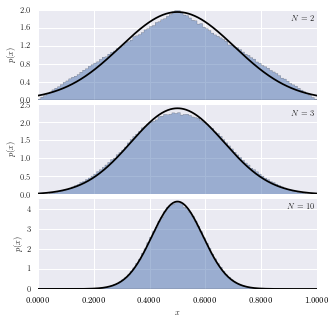

In [9]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from scipy.stats import norm

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate the uniform samples
N = [2, 3, 10]

np.random.seed(42)
x = np.random.random((max(N), 1E6))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.05)

for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i + 1)

    # take the mean of the first N[i] samples
    x_i = x[:N[i], :].mean(0)

    # histogram the data
    print len(x_i)
    ax.hist(x_i, bins=np.linspace(0, 1, 101),
            histtype='stepfilled', alpha=0.5, normed=True)

    # plot the expected gaussian pdf
    mu = 0.5
    sigma = 1. / np.sqrt(12 * N[i])
    dist = norm(mu, sigma)
    x_pdf = np.linspace(-0.5, 1.5, 1000)
    ax.plot(x_pdf, dist.pdf(x_pdf), '-k')

    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.001, None)

    ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax.text(0.99, 0.95, r"$N = %i$" % N[i],
            ha='right', va='top', transform=ax.transAxes)

    if i == len(N) - 1:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
        ax.set_xlabel(r'$x$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylabel('$p(x)$')

plt.show()

In [50]:
from bokeh.io import output_notebook, show, vform
from bokeh.plotting import figure, Figure
from bokeh.models import ColumnDataSource, Slider, CustomJS
import numpy as np

output_notebook()

x = np.sort(np.random.uniform(0, 100, 2000))
y = np.sin(x*10) + np.random.normal(scale=0.1, size=2000)
fig = Figure(plot_height=400)

mask = (x > 0) & (x < 2)

source1 = ColumnDataSource(data={"x":x[mask], "y":y[mask]}, id="source1")
source2 = ColumnDataSource(data={"x":x, "y":y}, id="source2")
line = fig.line(x="x", y="y", source=source1)

callback = CustomJS(args=dict(s1=source1, s2=source2), code="""
var d1 = s1.get("data");
var d2 = s2.get("data");
var start = cb_obj.get("value");
var s = Bokeh._.findIndex(d2["x"], function(v){return v > start;});
var e = Bokeh._.findIndex(d2["x"], function(v){return v > start + 2;});
d1["x"] = [];
d1["y"] = [];
for(i=s;i<=e;i++){
    d1["x"].push(d2["x"][i]);
    d1["y"].push(d2["y"][i]);
}
s1.trigger("change");
""")
slider = Slider(start=0, end=100, step=2, callback=callback)
show(vform(slider, fig))

BokehJS successfully loaded.

In [56]:
from bokeh.io import output_notebook, show, vform
from bokeh.plotting import figure, Figure
from bokeh.models import ColumnDataSource, Slider, CustomJS
import numpy as np

output_notebook()

x = np.sort(np.random.uniform(0, 100, 2000))
y = np.sin(x*10) + np.random.normal(scale=0.1, size=2000)
fig = Figure(plot_height=400, x_range=(0, 2))

source = ColumnDataSource(data={"x":x, "y":y})
line = fig.line(x="x", y="y", source=source)

callback = CustomJS(args=dict(x_range=fig.x_range), code="""
var start = cb_obj.get("value");
x_range.set("start", start);
x_range.set("end", start+2);
""")
slider = Slider(start=0, end=100, step=2, callback=callback)
show(vform(slider, fig))

BokehJS successfully loaded.

In [72]:
from bokeh.io import vform
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, show
output_notebook()


x = [x*0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))
source2 = ColumnDataSource(data=dict(x=x, y=y))

plot = Figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)
plot.line('x', 'y', source=source2, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source, source2=source2), code="""
        var data = source.get('data');
        var data2 = source.get('data');
        var f = cb_obj.get('value')
        
        x = data['x']
        y = data['y']
        x2 = data['x2']
        y2 = data['y2']
        alert(f)
        for (i = 0; i < x.length; i++) {
            y[i] = Math.pow(x[i], f)
           
        }
        source.trigger('change');
    """)

slider = Slider(start=0.1, end=4, value=1, step=.1, title="power", callback=callback)

layout = vform(slider, plot)

show(layout)

BokehJS successfully loaded.

ERROR:/Users/nobleWkennamer/anaconda/lib/python2.7/site-packages/bokeh/core/validation/check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 3100a54b-5eb7-4f0b-8c5c-8d8dec6725f9
ERROR:/Users/nobleWkennamer/anaconda/lib/python2.7/site-packages/bokeh/core/validation/check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 63a715cf-7641-487d-8022-193142bd12f2
ERROR:/Users/nobleWkennamer/anaconda/lib/python2.7/site-packages/bokeh/core/validation/check.py:W-1004 (BOTH_CHILD_AND_ROOT): Models should not be a document root if they are in a layout box: Figure, ViewModel:Plot, ref _id: 3d8fb9d1-2827-44b0-995f-11a5bd0dde01
ERROR:/Users/nobleWkennamer/anaconda/lib/python2.7/site-packages/bokeh/core/validation/check.py:W-1004 (BOTH_CHILD_AND_ROOT): Models should not be a document root if they are in a layout box: Figure, ViewModel:Plot, ref _id: 7900296c-bc69-4afe-9cf0-6bc449b1bfcc
ERROR:/Users/nobleWkennamer/anac